# Jupyter: um caderno computacional

1ª Semana de Workshops, ICMC - USP, 03/06/2021

Por Breno Lívio

---

*O workshop tem como o objetivo de introduzir o ambiente Jupyter e familiarizar estudantes oriundos do Instituto de Ciências Matemáticas e de Computação (ICMC) da Universidade de São Paulo (USP). Espera-se mostrar diversos exemplos de como esse caderno computacional pode ser utilizado, suas diferentes formas de usar, instalação e aplicações diversas.*

## 2 - Abrindo e gerando imagens

Possivelmente uma das maiores vantagens em cadernos como o Jupyter é a possibilidade de ter a interação de entrada e saída de forma possamos gerar objetos para serem renderizado no próprio ambiente. Dessa forma podemos gerar gráficos não apenas estáticos como também interativos.

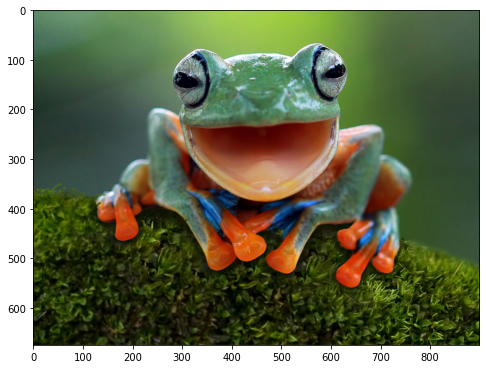

In [1]:
from PIL import Image
import imageio
import matplotlib.pyplot as plt

img = imageio.imread('Files/frog.jpg')

plt.figure(figsize = (8, 8))

plt.imshow(img)

plt.show()

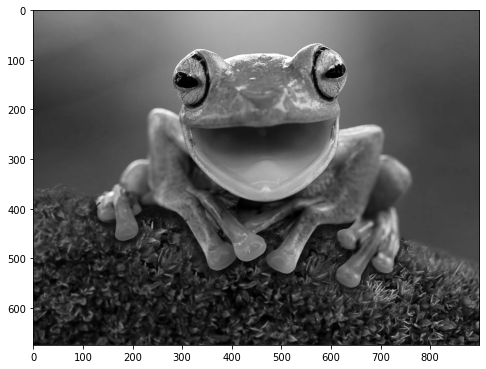

In [2]:
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B

plt.figure(figsize = (8, 8))

plt.imshow(imgGray, cmap='gray')

plt.show()

### Matplotlib

Matplotlib é uma biblioteca para fazer plots de arrays 2D em Python. Embora tenha suas origens na emulação dos comandos gráficos MATLAB, ela é independente do MATLAB, e pode ser usada de forma *pythonica*, orientada a objetos. Embora o Matplotlib seja escrito principalmente em Python puro, ele faz uso pesado do NumPy e de outros códigos de extensão para fornecer bom desempenho mesmo para grandes arrays. Mais sobre [aqui](https://matplotlib.org/stable/users/history.html).

Ela é a biblioteca mais famosa para se gerar imagens no Python, com muitos outros pacotes utilizando ela como dependência.

Podemos gerar gráficos como funções e afins:

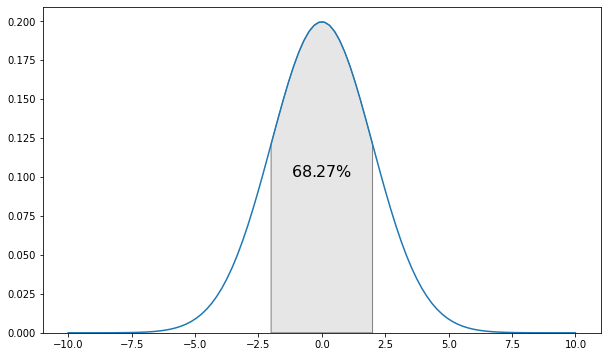

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.patches import Polygon
import math

mu = 0
sigma = 2

fig, ax = plt.subplots(figsize = (10, 6))

x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
ax.plot(x, stats.norm.pdf(x, mu, sigma))
ax.set_ylim(bottom=0)

ax.text(0, 0.1, r"$68.27\%$", horizontalalignment='center', fontsize=16)

a = mu - sigma
b = mu + sigma

ix = np.linspace(a, b)
iy = stats.norm.pdf(ix, mu, sigma)

verts = [(a, 0), * zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.show()

Como dito antes, o matplotlib é usado em outras diversos pacotes para funcionar. Por exemplo, no caso de gerar a rede a seguir:

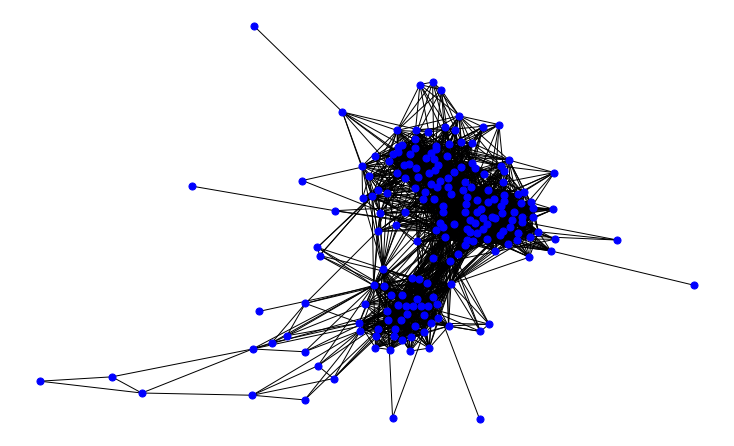

In [4]:
import networkx as nx

G = nx.read_edgelist("Files/jazz.txt", nodetype = int, data=(('weight',float),))

plt.figure(figsize = (10, 6))

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color = "b", node_size = 50, with_labels=False)

### Seaborn

É também uma biblioteca Python utilizada para traçar gráficos com a ajuda de Matplotlib, Pandas, e Numpy. É construída sobre o teto da Matplotlib e é considerada como um super conjunto da biblioteca Matplotlib. Ele ajuda na visualização de dados univariados e bivariados. Utiliza belos temas para a decoração dos gráficos Matplotlib.

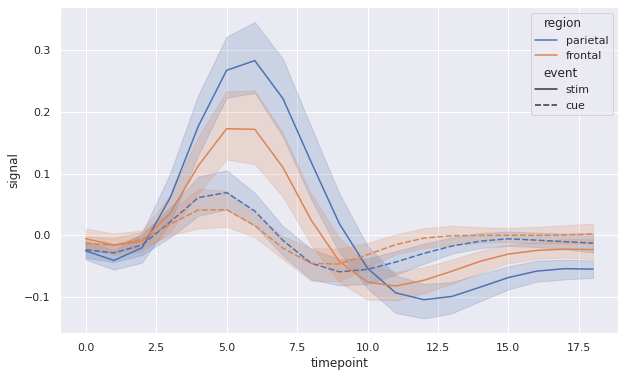

In [5]:
import seaborn as sns

sns.set_theme(style="darkgrid")

fmri = sns.load_dataset("fmri")

plt.figure(figsize = (10, 6))

sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri);

### Plotly

O matplotlib é uma ferramenta rápida e direta para criar visualizações dentro do Python, seria a mais recomendada para iniciantes que estão começando a mexer com visualização de dados.

O Plotly, por outro lado, é uma ferramenta de visualização de dados mais sofisticada e mais adequada para criar plots elaborados de forma mais eficiente. A interatividade e a estética elegante que vêm com o plotly são benefícios que não podem ser ignorados. O Plotly por si só já vem com uma certa interatividade por padrão.

Usando de um dataset da própria biblioteca podemos criar uma visualização simples:

In [6]:
import plotly.express as px

df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df, x="year", y="lifeExp", color='country')

fig.show()